In [1]:
#Suppressing possible warnings
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

# 1. Data 

In [6]:
import os
import pandas as pd

df = pd.read_csv('C:/Users/JeffChen/Python/nlp/data/recategorized_dogs_cats_data.csv', index_col = False)

In [26]:
display(df.head(2))

reviewerID        asin        reviewerName helpful  \
0  A14CK12J7C7JRK  1223000893  Consumer in NorCal  [0, 0]   
1  A39QHP5WLON5HV  1223000893     Melodee Placial  [0, 0]   

                                          reviewText  overall  \
0  I purchased the Trilogy with hoping my two cat...        3   
1  There are usually one or more of my cats watch...        5   

                                             summary  unixReviewTime  \
0  Nice Distraction for my cats for about 15 minutes      1294790400   
1                           Entertaining for my cats      1379116800   

    reviewTime                                            related  ...  \
0  01 12, 2011  {'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...  ...   
1  09 14, 2013  {'also_bought': ['B000G1KNPK', 'B00BYHJ6UI', '...  ...   

                           categories  \
0  [['Pet Supplies', 'Cats', 'Toys']]   
1  [['Pet Supplies', 'Cats', 'Toys']]   

                                         description category_len  \
0  This combo pack provides you with all 3 Cat Si...            3   
1  This combo pack provides you with all 3 Cat Si...            3   

     category_1 category_2 category_3 category_4  category_5  \
0  Pet Supplies       Cats       Toys        NaN         NaN   
1  Pet Supplies       Cats       Toys        NaN         NaN   

  updated_category_4 final_category_4  
0                NaN              NaN  
1                NaN              NaN  

[2 rows x 25 columns]

In [10]:
df.groupby('category_2').count()

reviewerID   asin  reviewerName  helpful  reviewText  overall  \
category_2                                                                  
Cats             34149  34149         33604    34149       34097    34149   
Dogs             95755  95755         95199    95755       95672    95755   

            summary  unixReviewTime  reviewTime  related  ...  brand  \
category_2                                                ...          
Cats          34149           34149       34149    33989  ...  29498   
Dogs          95755           95755       95755    94903  ...  80601   

            categories  description  category_len  category_1  category_3  \
category_2                                                                  
Cats             34149        26896         34149       34149       34141   
Dogs             95755        73368         95755       95755       95755   

            category_4  category_5  updated_category_4  final_category_4  
category_2                                                                
Cats             32360        7772                2696             32360  
Dogs             94156       40468                6887             94156  

[2 rows x 24 columns]

In [12]:
pd.crosstab(df.category_3, df.category_2)

category_2                     Cats   Dogs
category_3                                
Apparel & Accessories             0   2202
Beds & Furniture               5840   2557
Cages                            19      0
Carriers & Strollers             88      0
Carriers & Travel Products        0   3347
Cat Flaps, Steps, Nets & Pens   217      0
Collars, Harnesses & Leashes    193   8205
Doors, Gates & Ramps              0    872
Educational Repellents          225      0
Feeding & Watering Supplies    1093   7160
Food                           5999   7865
Grooming                       1150   7964
Health Supplies                4294  12368
Houses, Kennels & Pens            0   1868
Litter & Housebreaking         4893   5135
Memorials                         0     26
Toys                           7893  18997
Training & Behavior Aids          0   2426
Treats                         2237  14763

In [23]:
df_dry_cat_food = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Food') & (df.category_4 == 'Dry')]

In [25]:
display(df_dry_cat_food.head(2))

reviewerID        asin             reviewerName helpful  \
820  A2V9DTXTQ5YIMK  B000084DWM  A. Hudson "bisou bisou"  [1, 1]   
821   ACTG54OIB9IIR  B000084DWM             Amazon woman  [3, 6]   

                                            reviewText  overall  \
820  I used to only buy Science Diet. Knowing my el...        2   
821  I used this food with one cat for five years a...        1   

                                          summary  unixReviewTime  \
820  Nine different cats and none of them like it      1390262400   
821                              causes vomiting?      1362441600   

      reviewTime                                            related  ...  \
820  01 21, 2014  {'also_bought': ['B001VIWG2K', 'B000QSN7P6', '...  ...   
821   03 5, 2013  {'also_bought': ['B001VIWG2K', 'B000QSN7P6', '...  ...   

                                    categories  description category_len  \
820  [['Pet Supplies', 'Cats', 'Food', 'Dry']]          NaN            4   
821  [['Pet Supplies', 'Cats', 'Food', 'Dry']]          NaN            4   

       category_1 category_2 category_3 category_4  category_5  \
820  Pet Supplies       Cats       Food        Dry         NaN   
821  Pet Supplies       Cats       Food        Dry         NaN   

    updated_category_4 final_category_4  
820                NaN              Dry  
821                NaN              Dry  

[2 rows x 25 columns]

In [27]:
pd.crosstab(df_dry_cat_food.category_4, df_dry_cat_food.category_3)

category_3  Food
category_4      
Dry         1961

In [28]:
df_dry_cat_food.shape

(1961, 25)

In [29]:
df_dry_cat_food.asin.nunique()

130

In [48]:
df_cat_food = df.loc[(df.category_2 == 'Cats') & (df.category_3 == 'Food')]
pd.crosstab(df_cat_food.category_4, df_cat_food.category_3)
df_cat_food.asin.nunique()
df_review = df_cat_food[['reviewText', 'overall']]

In [49]:
df_review.shape

(5999, 2)

# 2. Data Exploration

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

#1. Pandas – library for data analysis and data manipulation
#2. Matplotlib – library used for data visualization
#3. Seaborn – a library based on matplotlib and it provides a high-level interface for data visualization
#4. WordCloud – library to visualize text data
#5. re Regular Expressions (Regex) – provides functions to pre-process the strings as per the given regular expression 

#conda install -c conda-forge wordcloud
#pip install regex

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

#1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing
#2. stopwords – a collection of words that don’t provide any meaning to a sentence
#3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact.

#pip install --user -U nltk

In [35]:
display(df_review.head(10))

reviewText  overall
820  I used to only buy Science Diet. Knowing my el...        2
821  I used this food with one cat for five years a...        1
822  I got this for my kitties and all but one love...        5
823  I ordered Hill's Science for my 2 cats earlier...        5
824  Science Diet, I use for many years. My Cat is ...        5
825  All of my cats like it. It is a quality dry fo...        5
826  This cat food contains a lower level of magnes...        5
827  Horrific cat food made with junk ingredients. ...        1
828  My two cats age 5 and 18, yes, 18 love this fo...        5
829  Both my cats love Hills Science Diet food!  It...        5

<AxesSubplot:xlabel='overall', ylabel='count'>

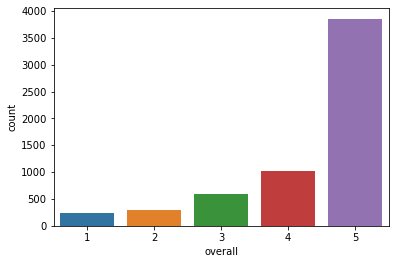

In [50]:
sns.countplot(df_review.overall)

perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

We will create a function for pre-processing of data.

1. First, we will iterate through each record, and using a regular expression, we will get rid of any characters apart from alphabets.
2. Then, we will convert the string to lowercase as, the word “Good” is different from the word “good”.
3. Then we will check for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.
4. Then, we will perform lemmatization on each word,i.e. change the different forms of a word into a single item called a lemma. A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.
5. And, then return a corpus of processed data.

In [37]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()

def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [39]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\JeffChen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [51]:
corpus = text_transformation(df_review['reviewText'])

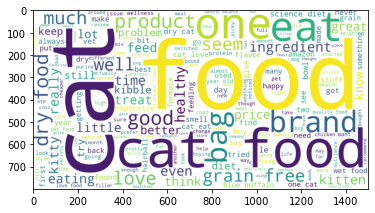

In [42]:
#rcParams['figure.figsize'] = 20,8
# Dry cat food
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1500, height = 800,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

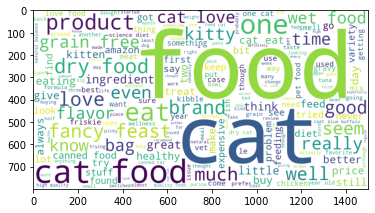

In [52]:
# Cat food
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1500, height = 800,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

# 3. Topic Modeling using BERTopic 

In [53]:
from bertopic import BERTopic

#review_text = df_sentiment.clean_text.to_list()
#timestamp = df.date.to_list()

topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(corpus)

topic_model.get_topic_info()

Topic  Count                               Name
0      -1   3098               -1_cat_food_like_eat
1       0    308     0_price_amazon_store_delivered
2       1    221       1_kitten_wellness_month_food
3       2    141            2_gravy_love_chunk_lick
4       3    138              3_smell_like_cat_good
..    ...    ...                                ...
61     60     12      60_buffalo_blue_nutrience_dog
62     61     12  61_recall_recalled_puk_salmonella
63     62     12            62_sample_see_win_brand
64     63     12   63_persian_himalayan_face_beauty
65     64     10    64_nose_turn_turned_unoffensive

[66 rows x 3 columns]

In [54]:
topic_model.visualize_topics()

In [55]:
topic_model.visualize_barchart()

In [56]:
topic_model.visualize_heatmap()

# 4. Sentiment Analysis

In [57]:
from nltk import tokenize
sents = [tokenize.sent_tokenize(str(r)) for r in df_review.reviewText.tolist()]
columns_name = ['Sentence' + str(i) for i in range(1, 31, 1)]
sents_df = pd.DataFrame([sen[:30] for sen in sents], columns = columns_name)

In [58]:
sents_df.head(3)

Sentence1  \
0                   I used to only buy Science Diet.   
1  I used this food with one cat for five years a...   
2  I got this for my kitties and all but one love...   

                                           Sentence2  \
0  Knowing my elderly special needs cat did not l...   
1  After she died, I got another cat at 4 years o...   
2                            Theyre very very picky.   

                                           Sentence3  \
0  Big mistake.He did not like it and after a few...   
1  The lightbulb finally went off in my head- sto...   
2  Have been feeding them purina one chicken and ...   

                                           Sentence4  \
0  I decided to give it to another house cat I ha...   
1                    Hmmmm.My carpets are happy too.   
2  One of them (the one who doesnt love it) loves...   

                                           Sentence5  \
0  I have tried it on 7 feral cats and they are n...   
1                                               None   
2  I have one that eat hills prescription diet k/...   

                                           Sentence6  \
0                       They eat it but not eagerly.   
1                                               None   
2  Im hoping it will be loved by the other over t...   

                                           Sentence7               Sentence8  \
0  I poured the bag in a food bin and every time ...  It is heavy with oils.   
1                                               None                    None   
2              Just started giving it to them today.                    None   

                                           Sentence9  \
0  It even smells disgusting.Sadly after trying t...   
1                                               None   
2                                               None   

                                          Sentence10  ... Sentence21  \
0  Try a sample locally or buy a smaller bag if y...  ...       None   
1                                               None  ...       None   
2                                               None  ...       None   

  Sentence22 Sentence23 Sentence24 Sentence25 Sentence26 Sentence27  \
0       None       None       None       None       None       None   
1       None       None       None       None       None       None   
2       None       None       None       None       None       None   

  Sentence28 Sentence29 Sentence30  
0       None       None       None  
1       None       None       None  
2       None       None       None  

[3 rows x 30 columns]

In [60]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\JeffChen\AppData\Roaming\nltk_data...


True

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

for col in sents_df.columns:
    new_col = col + '_sentiment'
    sents_df[new_col] = sents_df[col].astype(str).apply(sid.polarity_scores)
    sents_df[new_col] = sents_df[new_col].apply(lambda x: x['compound'])

In [63]:
sents_df.head(3)

Sentence1  \
0                   I used to only buy Science Diet.   
1  I used this food with one cat for five years a...   
2  I got this for my kitties and all but one love...   

                                           Sentence2  \
0  Knowing my elderly special needs cat did not l...   
1  After she died, I got another cat at 4 years o...   
2                            Theyre very very picky.   

                                           Sentence3  \
0  Big mistake.He did not like it and after a few...   
1  The lightbulb finally went off in my head- sto...   
2  Have been feeding them purina one chicken and ...   

                                           Sentence4  \
0  I decided to give it to another house cat I ha...   
1                    Hmmmm.My carpets are happy too.   
2  One of them (the one who doesnt love it) loves...   

                                           Sentence5  \
0  I have tried it on 7 feral cats and they are n...   
1                                               None   
2  I have one that eat hills prescription diet k/...   

                                           Sentence6  \
0                       They eat it but not eagerly.   
1                                               None   
2  Im hoping it will be loved by the other over t...   

                                           Sentence7               Sentence8  \
0  I poured the bag in a food bin and every time ...  It is heavy with oils.   
1                                               None                    None   
2              Just started giving it to them today.                    None   

                                           Sentence9  \
0  It even smells disgusting.Sadly after trying t...   
1                                               None   
2                                               None   

                                          Sentence10  ...  \
0  Try a sample locally or buy a smaller bag if y...  ...   
1                                               None  ...   
2                                               None  ...   

  Sentence21_sentiment Sentence22_sentiment Sentence23_sentiment  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   

  Sentence24_sentiment Sentence25_sentiment Sentence26_sentiment  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   

  Sentence27_sentiment Sentence28_sentiment Sentence29_sentiment  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   

  Sentence30_sentiment  
0                  0.0  
1                  0.0  
2                  0.0  

[3 rows x 60 columns]

In [67]:
sents_df.iloc[40]['Sentence1_sentiment'], sents_df.iloc[40]['Sentence1']

(0.4404, 'I believe in good pet food.')

In [73]:
sents_df.iloc[40]['Sentence2_sentiment'], sents_df.iloc[40]['Sentence2']

(0.4404, 'Have used wellness for years for both dogs and cats.')

In [74]:
sents_df.iloc[40]['Sentence3_sentiment'], sents_df.iloc[40]['Sentence3']

(0.2263, 'My cat likes beef but not seafood.')

In [75]:
sents_df.iloc[40]['Sentence4_sentiment'], sents_df.iloc[40]['Sentence4']

(0.0, 'Go figure.')

In [76]:
sents_df.iloc[40]['Sentence5_sentiment'], sents_df.iloc[40]['Sentence5']

(0.4588, 'This is her fav.')

In [72]:
df_review.iloc[40]['reviewText']

'I believe in good pet food.  Have used wellness for years for both dogs and cats.  My cat likes beef but not seafood.  Go figure.  This is her fav.'

In [77]:
df_review.iloc[40]['overall']

5

# 5. Emedding for topics and sentences

Use tensorflow to build NN to learn embedding for topics and sentences in the same domain space

## 5.1 Tokenization

In [94]:
tokenized = [cor.split(" ") for cor in corpus]

print(tokenized[0])

['used', 'buy', 'science', 'diet', 'knowing', 'elderly', 'special', 'need', 'cat', 'like', 'dry', 'food', 'decided', 'buy', 'bag', 'big', 'mistake', 'like', 'day', 'noticed', 'cat', 'food', 'dispenser', 'greasy', 'decided', 'give', 'another', 'house', 'cat', 'result', 'like', 'caretaker', 'feral', 'cat', 'colony', 'tried', 'feral', 'cat', 'even', 'crazy', 'eat', 'eagerly', 'poured', 'bag', 'food', 'bin', 'every', 'time', 'scoop', 'oil', 'scooper', 'also', 'plate', 'heavy', 'oil', 'even', 'smell', 'disgusting', 'sadly', 'trying', 'nine', 'different', 'cat', 'say', 'would', 'buy', 'try', 'sample', 'locally', 'buy', 'smaller', 'bag', 'hit']


## 5.2 Word2vec

In [101]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, vector_size=feature_size, window=context_size, min_count=min_word)

Wall time: 1.12 s


In [102]:
word_vec.save("word2vec.model")

In [103]:
word_bank = ["food", "cat", "dog", "good", "price"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

food: ['feed' 'evo' 'halo' 'wanted' 'choice']
cat: ['choice' 'verdict' 'tolerate' 'luck' 'chose']
dog: ['healthier' 'looking' 'highly' 'nutritionist' 'rated']
good: ['suppose' 'inexpensive' 'feel' 'decent' 'knowledge']
price: ['cheaper' 'grocery' 'prime' 'store' 'deal']


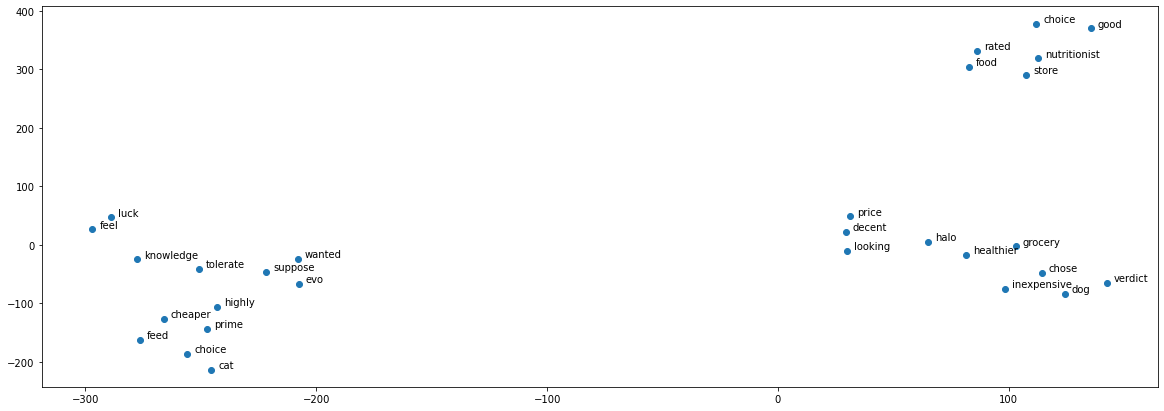

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(word_bank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(word_bank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

In [105]:
word_vec.wv.most_similar(positive=["cat", "food"], \
                      negative=[], topn=1)

[('choice', 0.9505051970481873)]

In [106]:
word_vec.wv.most_similar(positive=["cheap"], \
                      negative=["quality"], topn=1)

[('fatal', 0.7301464676856995)]

# 6. Find similarity scores between topics and sentences

Combinaiton with sentiment analysis to know the scores for the topics in each review

# 7. Find similarity scores between search query and product attributes

Semantic Search

# 8. LDA Topic modeling 

## Dictionary

In [108]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: also
ID: 1, Token: another
ID: 2, Token: bag
ID: 3, Token: big
ID: 4, Token: bin
ID: 5, Token: buy
ID: 6, Token: caretaker
ID: 7, Token: cat
ID: 8, Token: colony
ID: 9, Token: crazy


## Bag of words

In [109]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: also, Frequency: 1
Word: another, Frequency: 1
Word: bag, Frequency: 3
Word: big, Frequency: 1
Word: bin, Frequency: 1
Word: buy, Frequency: 4
Word: caretaker, Frequency: 1
Word: cat, Frequency: 6
Word: colony, Frequency: 1
Word: crazy, Frequency: 1
Word: day, Frequency: 1
Word: decided, Frequency: 2
Word: diet, Frequency: 1
Word: different, Frequency: 1
Word: disgusting, Frequency: 1
Word: dispenser, Frequency: 1
Word: dry, Frequency: 1
Word: eagerly, Frequency: 1
Word: eat, Frequency: 1
Word: elderly, Frequency: 1
Word: even, Frequency: 2
Word: every, Frequency: 1
Word: feral, Frequency: 2
Word: food, Frequency: 3
Word: give, Frequency: 1
Word: greasy, Frequency: 1
Word: heavy, Frequency: 1
Word: hit, Frequency: 1
Word: house, Frequency: 1
Word: knowing, Frequency: 1
Word: like, Frequency: 3
Word: locally, Frequency: 1
Word: mistake, Frequency: 1
Word: need, Frequency: 1
Word: nine, Frequency: 1
Word: noticed, Frequency: 1
Word: oil, Frequency: 2
Word: plate, Frequency: 1
Word:

In [110]:
%%time
import multiprocessing

from gensim.models.ldamulticore import LdaMulticore

cores = multiprocessing.cpu_count()

num_topics = 10
bow_lda = LdaMulticore(bow, num_topics=num_topics, id2word=vocabulary, \
                       passes=5, workers=cores, random_state=42)

for token, frequency in bow_lda.show_topic(0, topn=5):
    print(token, frequency)

cat 0.05470666
food 0.051427476
like 0.012657824
one 0.010432938
love 0.0078876065
Wall time: 35.6 s


In [111]:
for topic in range(0, num_topics):
    print(f"\nTopic {topic+1}:")
    for token, frequency in bow_lda.show_topic(topic, topn=5):
        print(f" {token}, {frequency}")


Topic 1:
 cat, 0.05470665916800499
 food, 0.05142747610807419
 like, 0.012657823972404003
 one, 0.010432938113808632
 love, 0.007887606509029865

Topic 2:
 food, 0.057932786643505096
 cat, 0.035209037363529205
 ingredient, 0.01208112109452486
 product, 0.01183551736176014
 dry, 0.011312904767692089

Topic 3:
 cat, 0.05023970082402229
 like, 0.03041696362197399
 food, 0.028040045872330666
 one, 0.01928975246846676
 eat, 0.010607782751321793

Topic 4:
 cat, 0.048318952322006226
 food, 0.033525239676237106
 like, 0.017316780984401703
 love, 0.016341611742973328
 good, 0.012738744728267193

Topic 5:
 cat, 0.058829229325056076
 food, 0.04707439988851547
 eat, 0.013680393807590008
 one, 0.01007649302482605
 like, 0.009930035099387169

Topic 6:
 cat, 0.052687615156173706
 food, 0.04282267764210701
 love, 0.015496362932026386
 like, 0.013509855605661869
 eat, 0.010734708048403263

Topic 7:
 cat, 0.021957797929644585
 food, 0.01994718797504902
 kitty, 0.010842944495379925
 love, 0.008576232939

# 8. Top2Vec
https://github.com/ddangelov/Top2Vec

1. Each product has topics with scores
2. Create vector fort each product

In [79]:
from top2vec import Top2Vec

model = Top2Vec(corpus)

2022-05-29 18:09:51,553 - top2vec - INFO - Pre-processing documents for training
2022-05-29 18:09:53,587 - top2vec - INFO - Creating joint document/word embedding
2022-05-29 18:10:43,088 - top2vec - INFO - Creating lower dimension embedding of documents
2022-05-29 18:11:06,216 - top2vec - INFO - Finding dense areas of documents
2022-05-29 18:11:07,065 - top2vec - INFO - Finding topics


In [80]:
model.save("cat_food")
#model = Top2Vec.load("cat_food")

In [81]:
model.get_num_topics()

3

In [82]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [83]:
topic_sizes

array([5359,  330,  310], dtype=int64)

In [84]:
topic_nums

array([0, 1, 2], dtype=int64)

In [85]:
topic_words, word_scores, topic_nums = model.get_topics(3)

In [86]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["smell"], num_topics=3)

In [87]:
topic_nums

array([0, 1, 2], dtype=int64)

In [88]:
topic_scores

array([ 0.51544162,  0.03049067, -0.46694016])

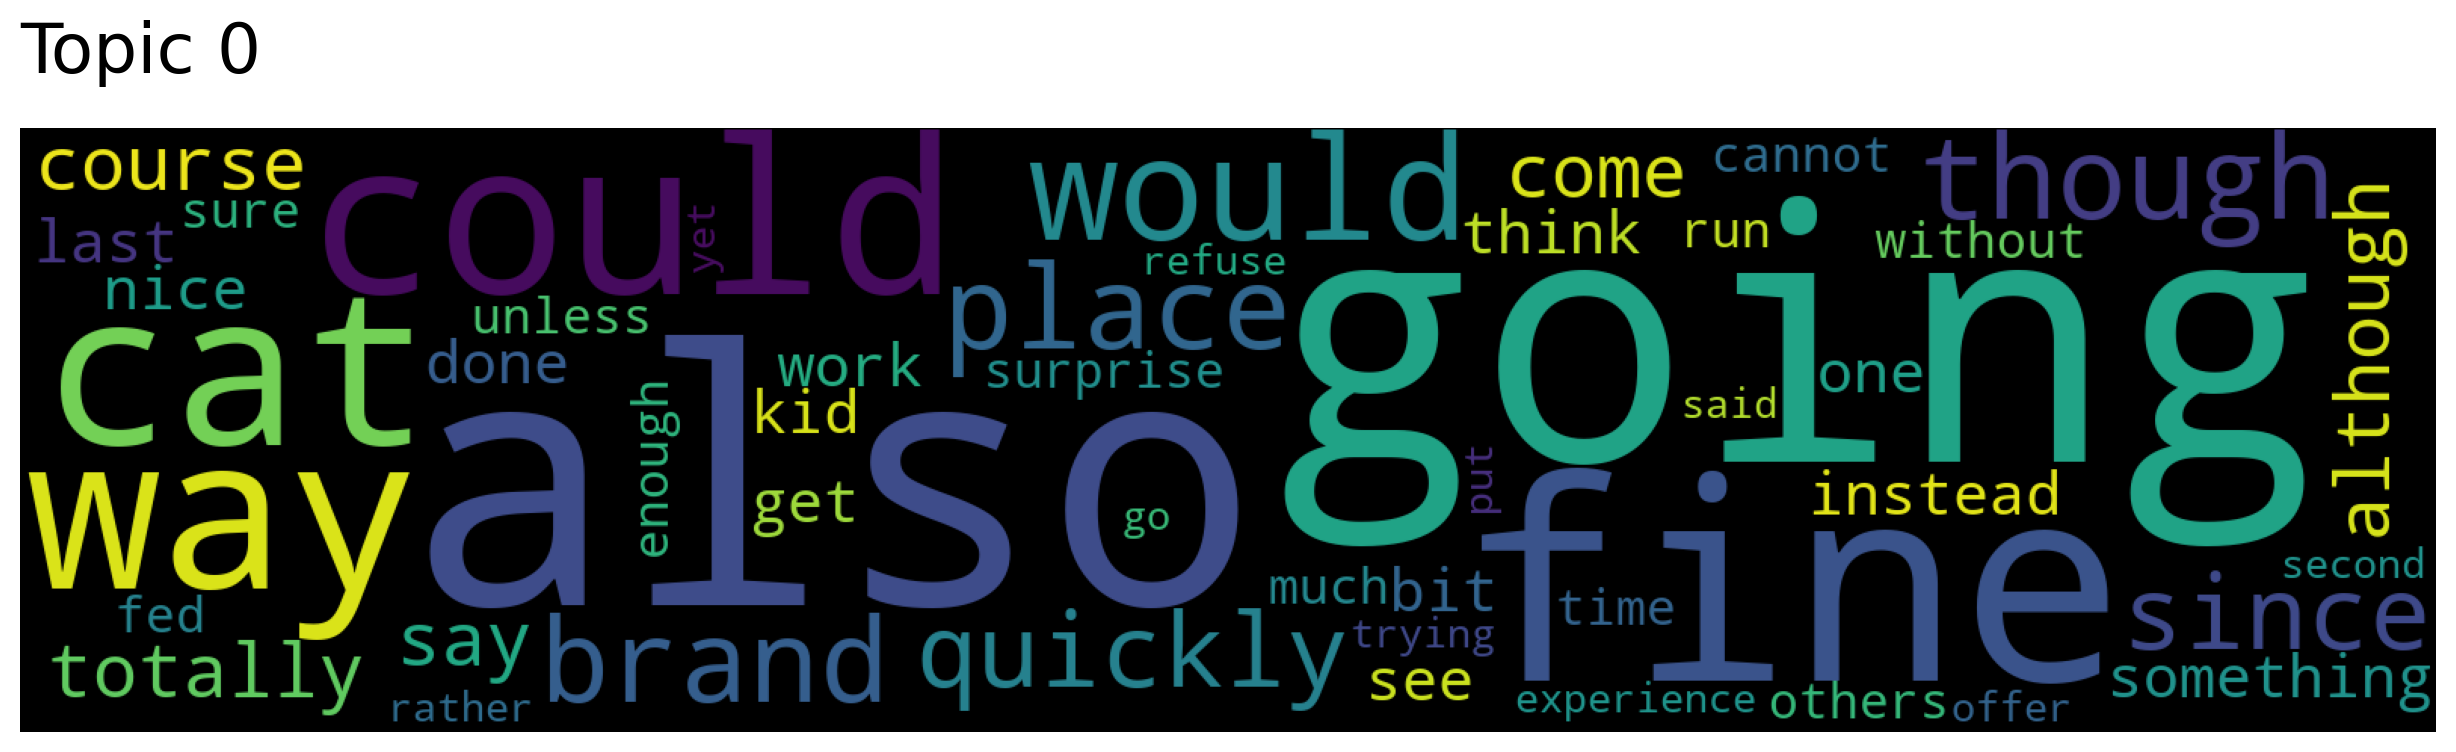

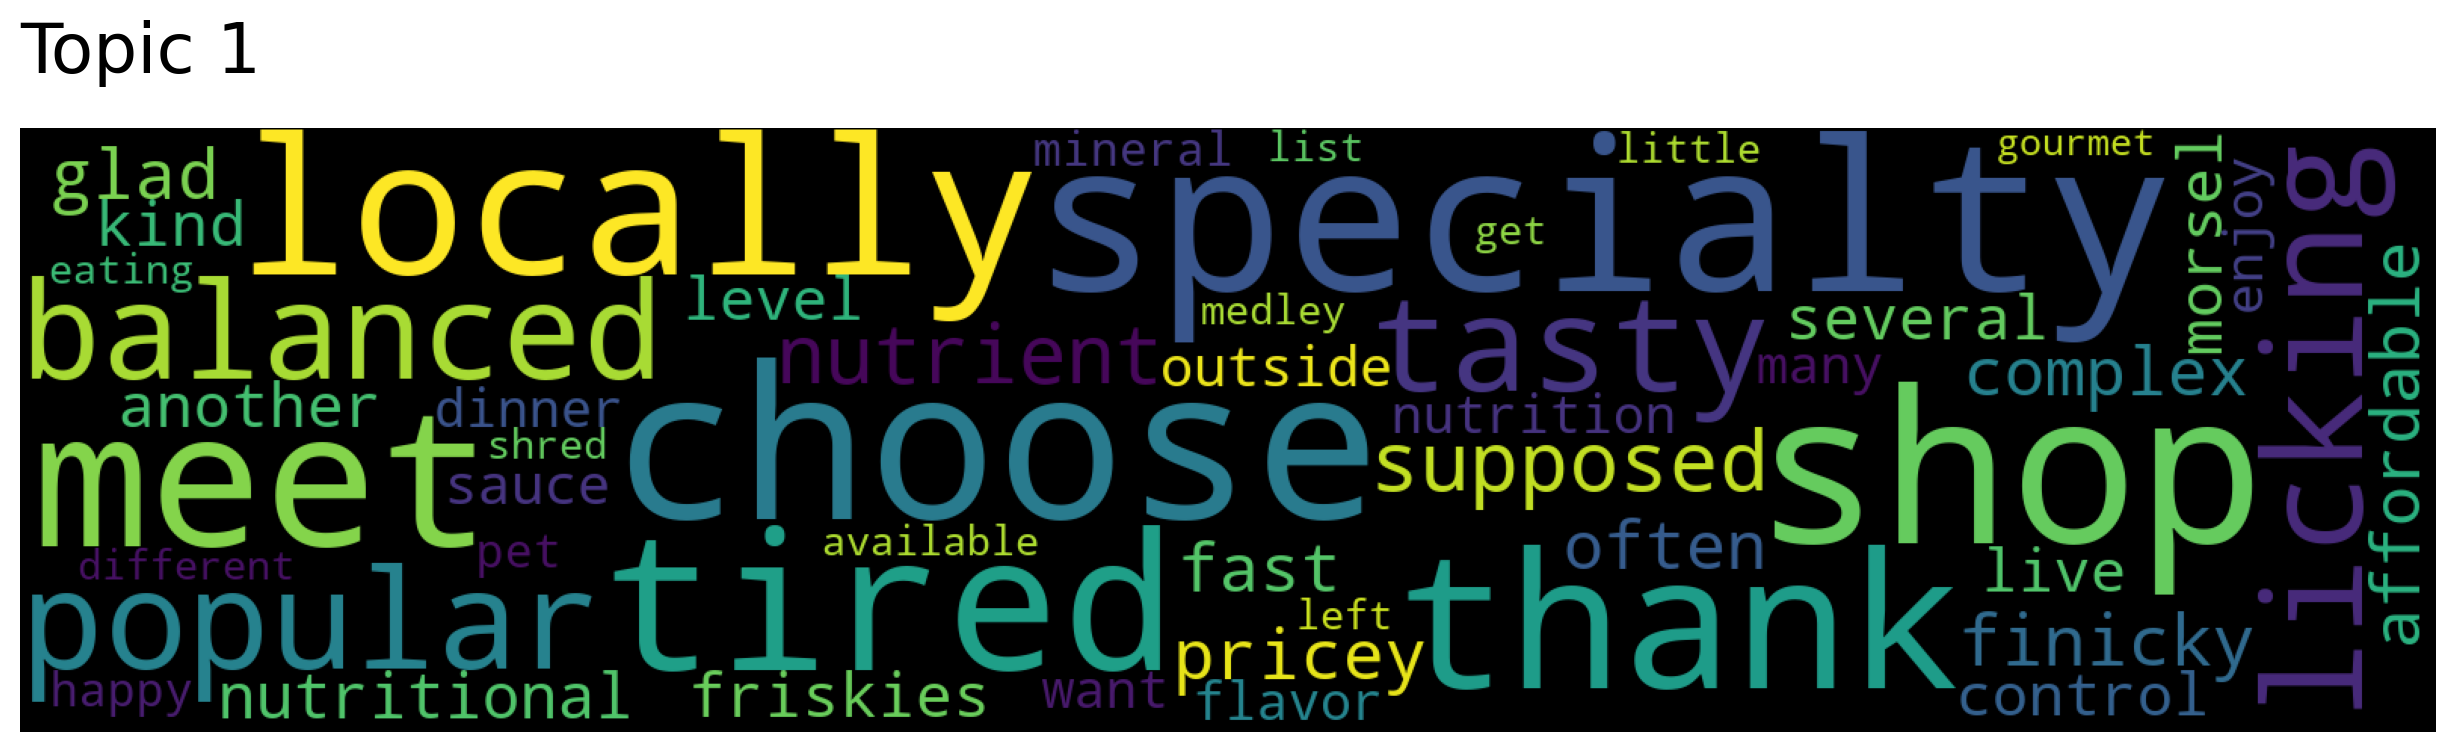

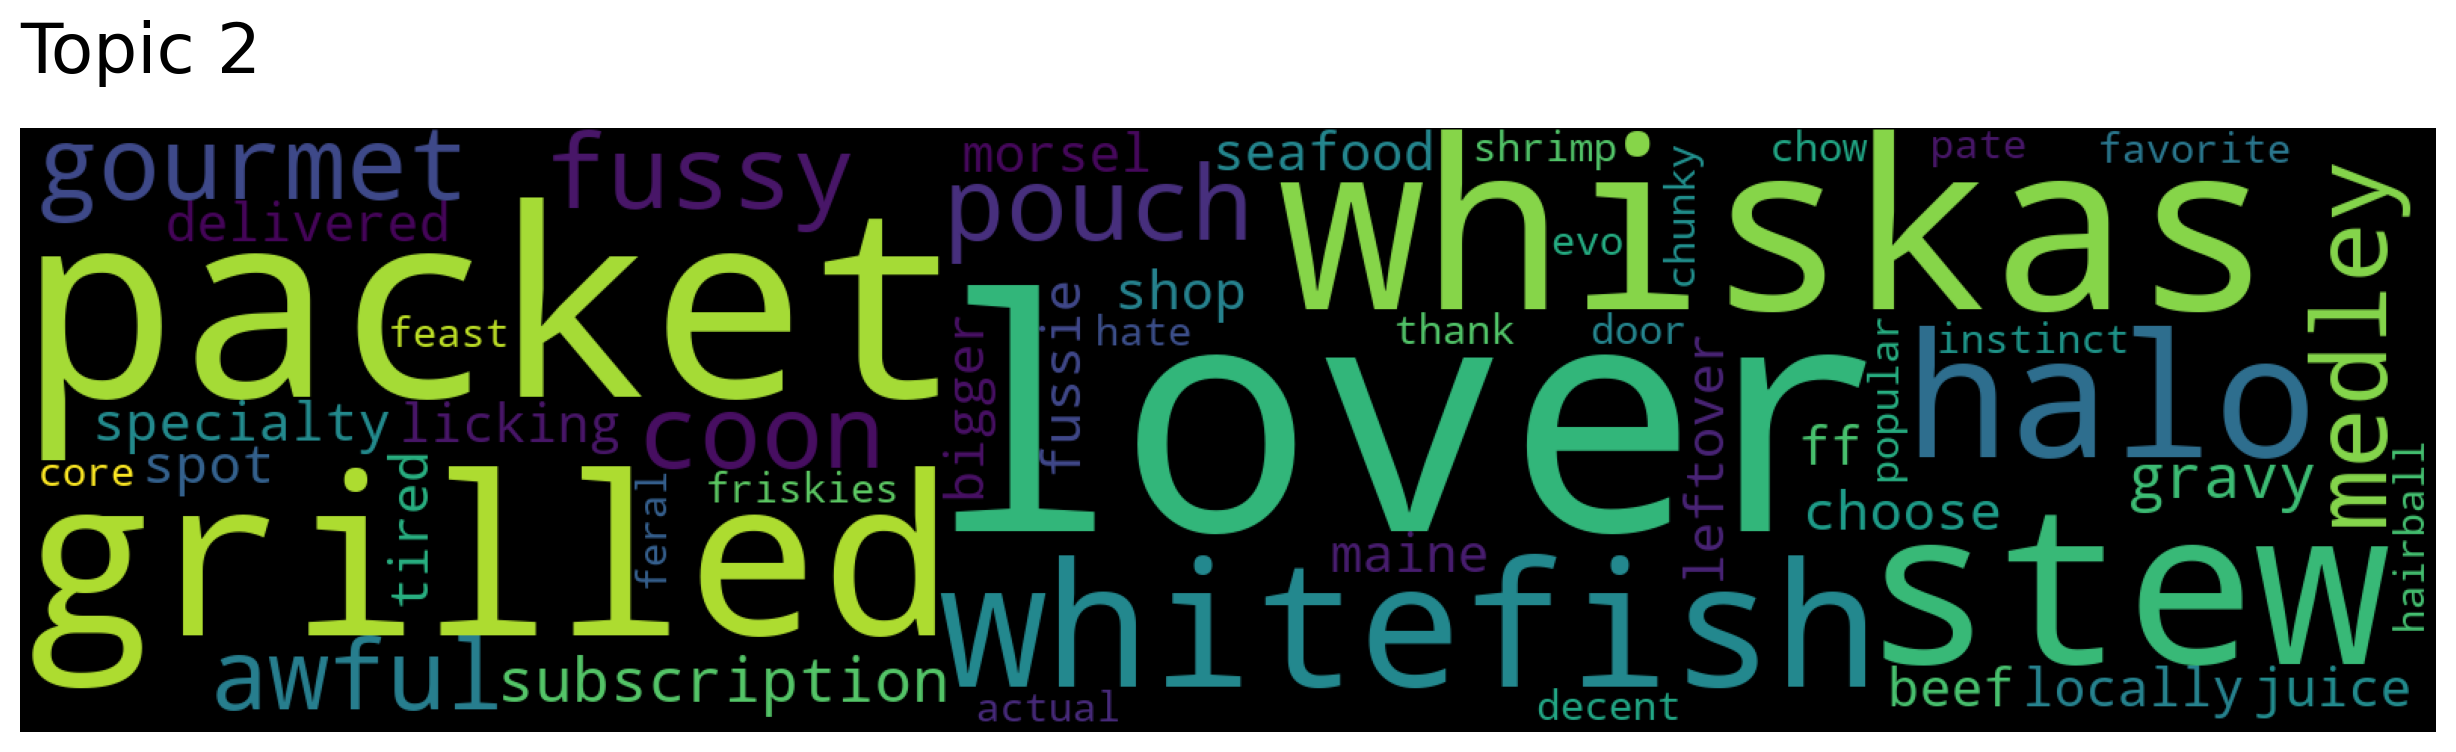

In [89]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["smell"], num_topics=3)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)